In [88]:
import pandas as pd
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt

df = pd.read_csv('claret_ldc.tsv', skiprows=49, delimiter='\t', header=None, names=['logg','Teff','Z','L/HP','a','b','mu','chi2','Mod','Sys'])
df[df['Teff'] == 10000]

,logg,Teff,Z,L/HP,a,b,mu,chi2,Mod,Sys
598,2.5,10000,0.0,2.0,0.1649,0.4119,0.2568,0.1165,PC,TESS
599,3.0,10000,0.0,2.0,0.1634,0.3271,0.1921,0.1077,PC,TESS
600,3.5,10000,0.0,2.0,0.1657,0.2765,0.1531,0.0944,PC,TESS
601,4.0,10000,0.0,2.0,0.1649,0.2456,0.1162,0.0879,PC,TESS
602,4.5,10000,0.0,2.0,0.1619,0.2300,0.0914,0.0845,PC,TESS
603,5.0,10000,0.0,2.0,0.1581,0.2206,0.0677,0.0829,PC,TESS
604,5.5,10000,0.0,2.0,0.1556,0.2167,0.0496,0.0828,PC,TESS
605,6.0,10000,0.0,2.0,0.1578,0.2153,0.0364,0.0850,PC,TESS


In [89]:
points = df[['Teff', 'logg']].to_numpy()
values = df[['a', 'b']].to_numpy()

In [90]:
from scipy.interpolate import griddata
griddata(points, values, (10100, 3.5), method='linear')

array([0.16305, 0.28015])

In [74]:
grid_z0 = griddata(points, values, (10000, 3.3), method='linear')

5.59 ms ± 54.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


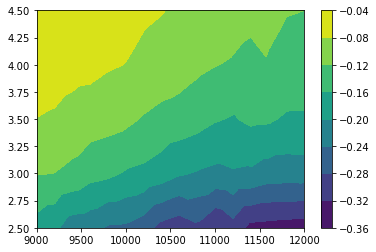

In [93]:
plt.contourf(X, Y, grid_z0[:,:,0]-grid_z0[:,:,1])
plt.colorbar()

In [34]:
grid_z0

1.2909

In [5]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [6]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]


In [7]:
grid_x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01010101, 0.01010101, 0.01010101, ..., 0.01010101, 0.01010101,
        0.01010101],
       [0.02020202, 0.02020202, 0.02020202, ..., 0.02020202, 0.02020202,
        0.02020202],
       ...,
       [0.97979798, 0.97979798, 0.97979798, ..., 0.97979798, 0.97979798,
        0.97979798],
       [0.98989899, 0.98989899, 0.98989899, ..., 0.98989899, 0.98989899,
        0.98989899],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [8]:
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

In [11]:
points

array([[0.132804  , 0.58547564],
       [0.7179368 , 0.5805899 ],
       [0.30820147, 0.68499719],
       ...,
       [0.17314477, 0.737855  ],
       [0.98162058, 0.46163188],
       [0.25707789, 0.86132743]])

In [19]:
len(points)

1000